In [1]:
import tensorflow as tf

In [2]:
a = tf.placeholder("float")
b = tf.placeholder("float")
#플레이스홀더: 프로그램 실행 중에 값을 변경할 수 있는 변수를 2개 정의
#데이터를 임시로 담는 버퍼같은 것

In [3]:
y = tf.multiply(a,b)
sess = tf.Session() #그래프 실행을 위해서는 세션이 필요
print(sess.run(y,feed_dict={a:3,b:2})) #y노드를 실행해라

6.0


In [4]:
# tensorflow.org

In [5]:
hello = tf.constant("Hello")
sess = tf.Session()
print(sess.run(hello))

b'Hello'


In [6]:
3 #랭크: 0(차원) tensor, shape: []
[1,2,3] #랭크: 1, shape: [3]
[[1,2,3],[1,2,3]] #랭크: 2 , shape: [2,3]
[[[1,2,3]],[[4,5,6]]] #랭크: 3, shape(각 차원의 요소의 개수): [2,1,3] 

[[[1, 2, 3]], [[4, 5, 6]]]

In [7]:
#tensor를 이용한 연산
a = tf.constant(10)
b = tf.constant(20)
sess = tf.Session()
# print(sess.run(tf.add(a,b)))
c = tf.add(a,b)
print(sess.run(c))
# print(c) #c 노드에 대한 tensor 정보가 출력됨
print(sess.run(a))
print(sess.run(b))
print(sess.run([a,b])) #두 개의 노드 a,b 동시 실행
sess.close() #세션 종료를 해주는게 좋음

30
10
20
[10, 20]


In [8]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adderNode = a+b
sess = tf.Session()
print(sess.run(adderNode, feed_dict={a:[5,1],b:[3,2]}))

[8. 3.]


In [9]:
#a=2, b=3
# => 5 * 3 => 15가 출력되도록 노드 정의 
triple = adderNode*3
print(sess.run(triple, feed_dict={a:2,b:3}))

15.0


In [10]:
x = tf.placeholder(tf.float32, [None,3]) # ?행3열
# print(x)
xdata = [[1,2,3],[4,5,6]] # 2행3열
xdata2 = [[1,2],[4,5]] #2행2열
print(sess.run(x, feed_dict={x:xdata}))
# print(sess.run(x, feed_dict={x:xdata2})) #Error: shape이 맞지 않음

[[1. 2. 3.]
 [4. 5. 6.]]


In [11]:
#변수(Variable) 정의
# H(x) = wx+b (w,b는 항상 variable)
# w = tf.Variable(tf.random_normal([2,1]))
w = tf.Variable([[1],[2]]) #초기값 직접 지정
# hf = tf.matmul(x,w)+b #행렬 곱셈(matrix multiply) 함수

In [13]:
xdata = [[1,2,3], #2행3열 (국어,영어,수학)
         [4,5,6]]
x = tf.placeholder(tf.float32, [None,3])
w = tf.Variable(tf.random_normal([3,1])) #각 과목 가중치
b = tf.Variable(tf.random_normal([1])) #편향(bias) => 오류 완충
hf = tf.matmul(x,w)+b
sess = tf.Session()

# hf = xw+b
sess.run(tf.global_variables_initializer())
print(sess.run(hf, feed_dict={x:xdata}))

# x의 shape=>(2,3) * (3,1) => (2,1)
# w의 shape=>? 

[[-1.0879587]
 [-3.4517007]]


## 선형 회귀 모델

In [16]:
xtrain = [80, 95, 97] #모의고사 점수 (3명)
ytrain = [82, 90, 98] #수능 점수 (3명)
#모의고사 70점 -> 수능?
#hf =  w*x+b
#82 = 80*1+2
#90 = 95*1+2

In [17]:
w = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))

In [18]:
hf = xtrain*w+b

In [19]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [20]:
print(sess.run([w,b,hf])) #[80, 95, 97]
#w=-0.35, b=0.49
#hf(예상)=[-27,-33,-33]
#    정답=[82, 90, 98]
#   cost=((-27-82)^2+(-33-80)^2+(-32-98)^2)/3
#cost 함수 미분 -> w,b 업데이트(back propagation)

#w=0.35, b=0
#hf(예상)=[27,33,33]

[array([-0.00348669], dtype=float32), array([-0.81272846], dtype=float32), array([-1.0916634, -1.1439636, -1.150937 ], dtype=float32)]


In [21]:
#우리의 모델
hf = xtrain*w+b
cost = tf.reduce_mean(tf.square(hf-ytrain))  #(예상값 - 실제값)합의 제곱에 대한 평균

In [22]:
opt = tf.train.GradientDescentOptimizer(0.0001)  # 0.0001 => learning rate
train = opt.minimize(cost) #경사 하강

In [23]:
#fit the line
# print(sess.run(cost), sess.run(w), sess.run(b))

In [24]:
# sess.run(train) #w,b 업데이트

In [25]:
# print(sess.run(cost), sess.run(w), sess.run(b))

In [26]:
# sess.run(train) #w,b 업데이트

In [27]:
# print(sess.run(cost), sess.run(w), sess.run(b))

In [28]:
# sess.run(train) #w,b 업데이트

In [29]:
# print(sess.run(cost), sess.run(w), sess.run(b))

In [30]:
for step in range(2001):
    sess.run(train)
    if step%100==0:
        print(step, sess.run(cost), sess.run(w), sess.run(b))

0 3595.4617 [1.6580901] [-0.7945027]
100 9.573062 [0.9999732] [-0.7990158]
200 9.5723505 [0.9999437] [-0.7963217]
300 9.571601 [0.99991435] [-0.79362756]
400 9.570891 [0.99988484] [-0.79093343]
500 9.570145 [0.9998554] [-0.7882393]
600 9.569444 [0.9998259] [-0.7855452]
700 9.568726 [0.99979615] [-0.78285104]
800 9.567981 [0.99976665] [-0.7801569]
900 9.567258 [0.99973714] [-0.7774628]
1000 9.566546 [0.99970764] [-0.77476865]
1100 9.565798 [0.9996783] [-0.7720745]
1200 9.565075 [0.9996488] [-0.7693813]
1300 9.56435 [0.9996191] [-0.7666905]
1400 9.5636425 [0.9995899] [-0.7640022]
1500 9.562924 [0.99956036] [-0.76131403]
1600 9.562182 [0.99953085] [-0.75862586]
1700 9.561467 [0.9995016] [-0.7559377]
1800 9.560741 [0.99947196] [-0.7532495]
1900 9.560021 [0.9994425] [-0.75056136]
2000 9.559293 [0.99941325] [-0.7478732]


In [31]:
#모의고사 점수가 50점 => 수능점수?
yhat = sess.run(w)[0]*50+sess.run(b)[0]
print("예상되는 수능점수는?", yhat)

예상되는 수능점수는? 49.22278940677643


In [32]:
#car 데이터에서 임의의 실린더 수(10, 12, 16)가 입력 -> hp?
#cost, w, b 출력
#cost 함수 시각화(w축)
#learning rate, training 횟수 조절

In [33]:
import pandas as pd
import tensorflow as tf

In [34]:
car = pd.read_csv("carsdata/cars.csv")
car

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.
...,...,...,...,...,...,...,...,...
256,17.0,8,305,130,3840,15,1980,US.
257,36.1,4,91,60,1800,16,1979,Japan.
258,22.0,6,232,112,2835,15,1983,US.
259,18.0,6,232,100,3288,16,1972,US.


In [35]:
xtrain = car[' cylinders']
ytrain = car[' hp']

In [36]:
xtrain = list(xtrain.values)
ytrain = list(ytrain.values)

In [37]:
w = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))

In [38]:
hf = xtrain*w+b

In [39]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [40]:
#모델
hf = xtrain*w+b
cost = tf.reduce_mean(tf.square(hf-ytrain))

In [41]:
opt = tf.train.GradientDescentOptimizer(0.01) #learning rante: 0.01
train = opt.minimize(cost) #경사 하강

In [42]:
li_w=[]
li_cost=[]
for step in range(4001): #training: 3300
    sess.run(train)
    if step%100==0:
        li_w.append(sess.run(w))
        li_cost.append(sess.run(cost))
        print(step, sess.run(cost), sess.run(w), sess.run(b))

0 1488.2745 [13.17834] [2.8218045]
100 470.55 [18.68212] [2.480624]
200 469.48004 [18.849058] [1.460594]
300 468.719 [18.989841] [0.6003802]
400 468.17786 [19.108566] [-0.12505792]
500 467.7929 [19.20869] [-0.7368375]
600 467.5192 [19.293129] [-1.252765]
700 467.32446 [19.364336] [-1.6878568]
800 467.1861 [19.424387] [-2.0547822]
900 467.08755 [19.475029] [-2.3642182]
1000 467.01752 [19.517736] [-2.6251733]
1100 466.96777 [19.553755] [-2.8452427]
1200 466.9323 [19.584127] [-3.0308337]
1300 466.9072 [19.609743] [-3.187343]
1400 466.88925 [19.631344] [-3.319335]
1500 466.8765 [19.649563] [-3.4306445]
1600 466.8675 [19.664925] [-3.5245152]
1700 466.86102 [19.67788] [-3.6036792]
1800 466.8564 [19.688807] [-3.6704397]
1900 466.8532 [19.69802] [-3.7267404]
2000 466.8508 [19.705791] [-3.7742183]
2100 466.84918 [19.712343] [-3.81426]
2200 466.84793 [19.71787] [-3.8480272]
2300 466.84723 [19.72253] [-3.8765047]
2400 466.84653 [19.726461] [-3.9005184]
2500 466.8462 [19.729776] [-3.92077]
2600 46

In [43]:
import matplotlib.pyplot as plt

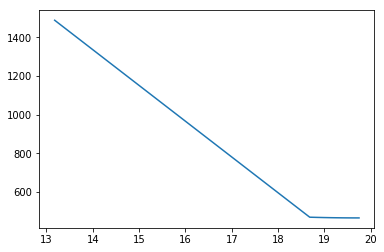

In [44]:
plt.plot(li_w,li_cost)
plt.show()